In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Đọc dữ liệu
df = pd.read_csv("FoodPrice_in_Turkey.csv")
df.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [4]:
# Thông tin bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [5]:
# Mô tả bộ dữ liệu
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [7]:
# Lọc dữ liệu gạo bán lẻ (Rice - Retail) ở National Average
df_rice = df[(df["ProductName"] == "Rice - Retail") & (df["Place"] == "National Average")]
df_rice.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [9]:
# Kích thước bộ dữ liệu
df_rice.shape

(66, 8)

In [10]:
# Mô tả bộ dữ liệu
df_rice.describe()

,ProductId,UmId,Month,Year,Price
count,66.0,66.0,66.000000,66.000000,66.000000
mean,52.0,5.0,6.454545,2016.257576,7.084923
std,0.0,0.0,3.561252,1.947864,1.417041
min,52.0,5.0,1.000000,2013.000000,4.492000
25%,52.0,5.0,3.000000,2015.000000,6.117500
50%,52.0,5.0,6.000000,2016.000000,6.523500
75%,52.0,5.0,9.750000,2018.000000,8.401025
max,52.0,5.0,12.000000,2019.000000,9.561600


C:\Users\HP\AppData\Local\Temp/ipykernel_9772/3335517244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rice["time"] = pd.to_datetime(df_rice["Year"].astype(str) + "/" + df_rice["Month"].astype(str))


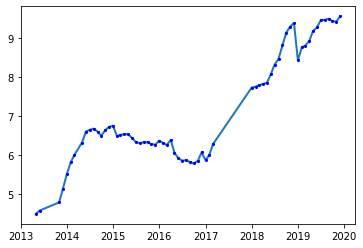

In [11]:
# Vẽ mối liên hệ giữa thời gian và giá gạo
df_rice["time"] = pd.to_datetime(df_rice["Year"].astype(str) + "/" + df_rice["Month"].astype(str))
plt.plot(df_rice["time"], df_rice["Price"], linewidth = 2, marker = "*", markersize = 2, markerfacecolor = "red", markeredgecolor = "blue", markeredgewidth = 2)
plt.show()

##### Tiến hành kiểm định:
- Do thời gian nhận giá trị tăng dần nên có thể được coi là một biến định lượng.
- Thực hiện kiểm định pearson để tiến hành kiểm định mối liên hệ giữa hai biến thời gian và giá.
- Biến đổi thời gian về dạng định lượng như sau: lấy mốc 1/2013 là mốc 1 tương đối, 1 tháng sẽ được tính là một đơn vị thời gian.

In [12]:
# Biến đổi thời gian
df_rice["time_processed"] = df_rice["Month"] + (df_rice["Year"] - 2013) * 12

C:\Users\HP\AppData\Local\Temp/ipykernel_9772/10332392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rice["time_processed"] = df_rice["Month"] + (df_rice["Year"] - 2013) * 12


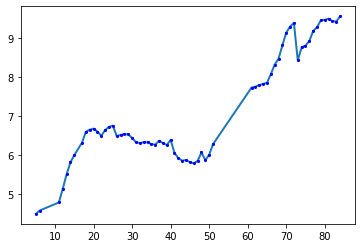

In [13]:
# Vẽ lại biểu đồ liên hệ giữa time_processed và giá gạo
plt.plot(df_rice["time_processed"], df_rice["Price"], linewidth = 2, marker = "*", markersize = 2, markerfacecolor = "red", markeredgecolor = "blue", markeredgewidth = 2)
plt.show()

##### Tiến hành kiểm định:
- Giả thuyết không: giữa thời gian và giá gạo không có mối tương quan.
- Giả thuyết đối: giữa thời gian và giá gạo có mối tương quan.

In [15]:
print("Hệ số tương quan và pvalue tương ứng là: ", stats.pearsonr(df_rice["time_processed"], df_rice["Price"]))

Hệ số tương quan và pvalue tương ứng là:  (0.8836736355854854, 8.931326276853385e-23)


- Nhận xét: Do pvalue ~ 0 và hệ số tương quan = 0.88 nên giữa thời gian và giá gạo có mối tương quan thuận rất chặt chẽ với nhau.